<h1> League of Legends' Popularity in relation to Arcane</h1>
<h4>Alex Baumgartner</h4>


League of Legends is one of the largest video games of all time. Throughout its 10 years of stardom, the community has been growing at a steady pace. Riot Games, the creator's of League of Legends, have recently started broadening their influence, creating several other titles such as Valorant, Legends of Runeterra, Teamfight Tactics, and several smaller games developed through their publishing label Riot Forge.<p></p>
Riot's most recent endeavor was Arcane: a 9 episode Netflix series that aired on November 6th, 2021, and was fully released by November 20th. Arcane was wildly successful and almost immediately was within the top 10 chart in over 50 countries. The show was also Netflix's number one program in the month of November.<p>
Off of this wild success, it would only make sense that League of Legends, the game Arcane's story is derived from, would see a spike in popularity.

In [116]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib
from matplotlib import pyplot as plt
import html5lib
import numpy as np

After importing the required packages, I used the read html feature to find the table that contains the playerbase data, including Average Monthly Players. Most websites have very similar numbers, although they sometimes differ slightly.

In [2]:
url = "https://leaguefeed.net/did-you-know-total-league-of-legends-player-count-updated/"

r = requests.get(url)
MAP_lf_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
MAP_lf_df = MAP_lf_list[0]
MAP_lf_df.head(12)

,Month,Average Monthly Players,Peak Players In a Day
0,Last 30 Days,180000000,31512723
1,"September 30, 2021",125995870,11339628
2,"August 30, 2021",126550278,11389525
3,"July 30, 2021",128014473,11521303
4,"June 30, 2021",126335475,11370193
5,"May 30, 2021",121566901,10941021
6,"April 30, 2021",118501466,10665132
7,"March 30, 2021",120302279,10827205
8,"February 28, 2021",117522367,10577013
9,"January 30, 2021",115647815,10408303


After loading the table data into a dataframe, I reversed the order of the table so that it would display in chronological order from left to right when graphed

In [3]:
MAP_reindex = MAP_lf_df[::-1].reset_index().tail(12)

In [4]:
MAP_reindex.tail(12)

,index,Month,Average Monthly Players,Peak Players In a Day
22,11,"November 30, 2020",116916136,10522452
23,10,"December 30, 2020",121206637,10908597
24,9,"January 30, 2021",115647815,10408303
25,8,"February 28, 2021",117522367,10577013
26,7,"March 30, 2021",120302279,10827205
27,6,"April 30, 2021",118501466,10665132
28,5,"May 30, 2021",121566901,10941021
29,4,"June 30, 2021",126335475,11370193
30,3,"July 30, 2021",128014473,11521303
31,2,"August 30, 2021",126550278,11389525


Looking at the past 12 months of data, We can see a steady increase throughout most of the year. In the last 30 days, we see the Monthly Active Players jump up to an astounding 180 million. 

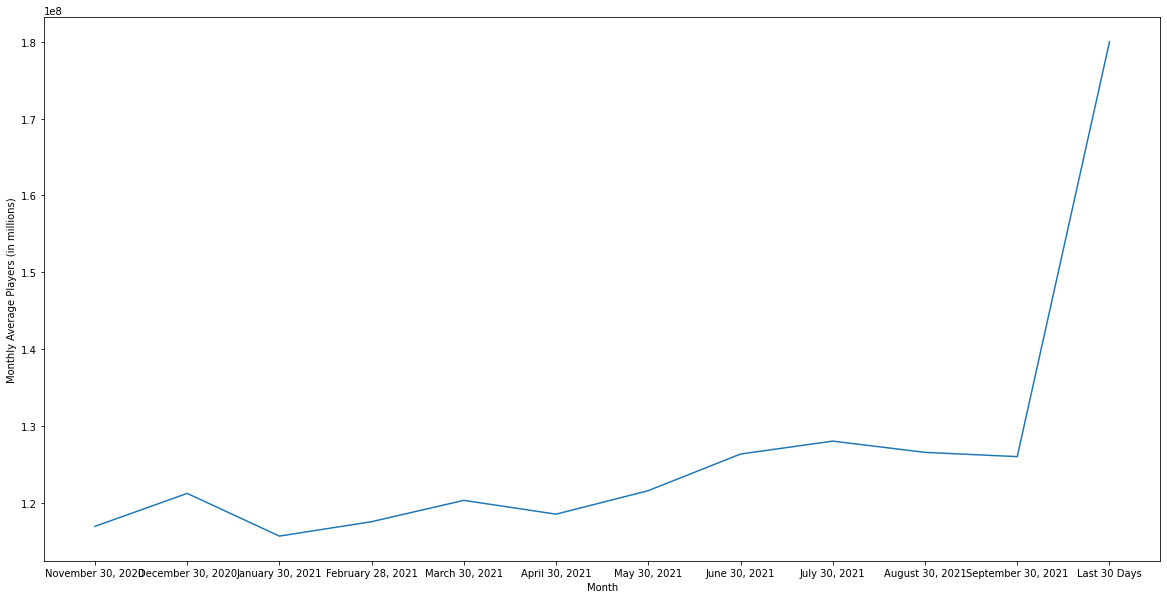

In [5]:
fig1, ax1 = plt.subplots(1,1, figsize=(20,10))
ax1.set_xlabel("Month")
ax1.set_ylabel("Monthly Average Players (in millions)")
ax1.plot(MAP_reindex.tail(12)["Month"], MAP_reindex.tail(12)["Average Monthly Players"])

This may seem like it lines up well with my thoughts about Arcane causing a spike in player numbers. This data, however, is not entirely accurate. The most recent data point, 180 million Monthly Active Players, is taken from a tweet by Riot games. This number is not just for League of Legends' player base. The tweet uses data from across several Riot Games titles, which does include League as the bulk of those users. However, this makes the data skewed and inaccurate.

Because of the lack of reliable data, I am considering removing this data from my final project and focusing more on the analysis below for champion playrates. I have been checking multiple websites but between the 180 million players data point being inaccurate and other websites not updating, it has been very hard to create a successful analysis.

I decided to look at another metric for the success of Arcane. The story of Arcane is centered around a handful of characters from League of Legends. Champion play rates are available online, so I decided to look at the characters' playrate before Arcane and after the show released. There are many factors that influence a champion's playrate, although every champion that was represented in Arcane saw an increase in popularity. 

In [21]:
url3 = "https://www.dexerto.com/league-of-legends/arcane-changed-league-of-legends-meta-season-12-1702049/"
response3 = requests.get(url3)

In [55]:
champ_list = pd.read_html(response3.text) # this parses all the tables in webpages to a list
champ_df = champ_list[0]
champ_df

,0,1,2,3
0,Champion,Playrate before Arcane,Current playrate,Peak playrate since Arcane
1,Caitlyn,14.99%,26.1%,26.1%
2,Ekko (Jungle),7.98%,6.96%,8.3%
3,Ekko (Mid),3.1%,3.31%,3.86%
4,Heimerdinger (Top),1.08%,1.33%,1.33%
5,Heimderdinger (Mid),0.8%,1.15%,1.26%
6,Jayce,3.68%,8.24%,11.85%
7,Jinx,11.85%,18.38%,18.38%
8,Singed,1.37%,2.3%,2.3%
9,Vi,5.74%,15.4%,18.14%


In [69]:
champ_df.columns = ['Champion', 'Playrate before Arcane', 'Current Playrate', 'Peak playrate since Arcane']

In [71]:
champ_df_1 = champ_df.drop(labels=0,axis=0)

In [72]:
champ_df_1

,Champion,Playrate before Arcane,Current Playrate,Peak playrate since Arcane
1,Caitlyn,14.99%,26.1%,26.1%
2,Ekko (Jungle),7.98%,6.96%,8.3%
3,Ekko (Mid),3.1%,3.31%,3.86%
4,Heimerdinger (Top),1.08%,1.33%,1.33%
5,Heimderdinger (Mid),0.8%,1.15%,1.26%
6,Jayce,3.68%,8.24%,11.85%
7,Jinx,11.85%,18.38%,18.38%
8,Singed,1.37%,2.3%,2.3%
9,Vi,5.74%,15.4%,18.14%
10,Viktor,2.53%,4.17%,4.17%


After reading in the data from the webpage, I tidied it up slightly, renaming the columns and making it function more. The data was in percentages, which would mess up the visualizations, so I had to mess with the data again to strip the percent symbol and rewrite the data points as decimals.

In [ ]:
champ_df_1['Playrate before Arcane'] = champ_df_1['Playrate before Arcane'].str.rstrip('%').astype('float') / 100.0

In [92]:
champ_df_1['Current Playrate'] = champ_df_1['Current Playrate'].str.rstrip('%').astype('float') / 100.0
champ_df_1['Peak playrate since Arcane'] = champ_df_1['Peak playrate since Arcane'].str.rstrip('%').astype('float') / 100.0

In [93]:
champ_df_1

,Champion,Playrate before Arcane,Current Playrate,Peak playrate since Arcane
1,Caitlyn,0.1499,0.2610,0.2610
2,Ekko (Jungle),0.0798,0.0696,0.0830
3,Ekko (Mid),0.0310,0.0331,0.0386
4,Heimerdinger (Top),0.0108,0.0133,0.0133
5,Heimderdinger (Mid),0.0080,0.0115,0.0126
6,Jayce,0.0368,0.0824,0.1185
7,Jinx,0.1185,0.1838,0.1838
8,Singed,0.0137,0.0230,0.0230
9,Vi,0.0574,0.1540,0.1814
10,Viktor,0.0253,0.0417,0.0417


In [80]:
champ_df_1['Champion'][2]

'Ekko (Jungle)'

After getting the data into a usable format, I graphed each point, showing each champion's playrate before Arcane and their Peak playrate since. Each champion involved saw an increase in playrate, and the main protagonists of the show, Caitlyn and Vi, saw the largest increases.

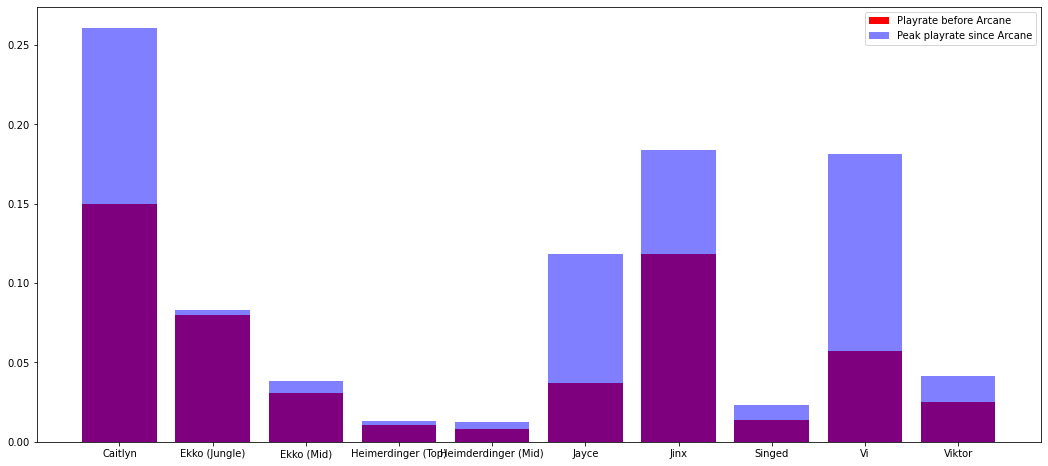

In [145]:
fig3, ax3 = plt.subplots(1,1,figsize=(18,8))
ax3.bar(champ_df_1['Champion'], champ_df_1['Playrate before Arcane'], alpha=1, color="r", label="Playrate before Arcane")
ax3.bar(champ_df_1['Champion'], champ_df_1['Peak playrate since Arcane'], alpha=0.5, color="b", label="Peak playrate since Arcane")
ax3.legend()

From here I plan on Looking at each champion's percent increase in playrate. I think that this will help to better show the increase for some of the less played champions. To more easily show percent change, I entered all of the original data into a new data frame, shifting around the position of everything to easily calculate the percent change in each champion's playrate. I did remove 2 sets of data from the set, removing Ekko jungle and Heimerding top. Each champion has a different play rate for each position they are commonly picked in, and most websites include fringe picks that are not common currently. These two data points were essentially outliers, as they were already very uncommon picks, so an increase in that pick would be very unlikely.

In [166]:
champ_pct_df = pd.DataFrame({
    "Caitlyn": [14.99, 26.10],
    "Ekko (Mid)": [3.10, 3.86],
    "Heimerdinger (Mid)": [.80, 1.26],
    "Jayce": [3.68, 11.85],
    "Jinx": [11.85, 18.38],
    "Singed": [1.37, 2.30],
    "Vi": [5.74, 18.14],
    "Viktor": [2.53, 4.17]},
    index=['Playrate before Arcane', 'Peak playrate since Arcane']
    )

In [167]:
champ_pct_df

,Caitlyn,Ekko (Mid),Heimerdinger (Mid),Jayce,Jinx,Singed,Vi,Viktor
Playrate before Arcane,14.99,3.10,0.80,3.68,11.85,1.37,5.74,2.53
Peak playrate since Arcane,26.10,3.86,1.26,11.85,18.38,2.30,18.14,4.17


In [168]:
champ_pct_df.pct_change()

,Caitlyn,Ekko (Mid),Heimerdinger (Mid),Jayce,Jinx,Singed,Vi,Viktor
Playrate before Arcane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Peak playrate since Arcane,0.741161,0.245161,0.575,2.220109,0.551055,0.678832,2.160279,0.648221


Every champion featured in Arcane saw an increase in playrate. Jayce was the largest increase at 222%, and Vi was close behind at 216% increase. The lowest percent change was Ekko, who only saw a 24% increase in pick rate, which is still noticeable. Caitlyn also saw a huge increase, although the percentage change was not as high as some others. Caitlyn reached a peak playrate of 26%, which is the highest pick rate in the game. As of November 6th, Caitlyn was the most picked champion at 25.8% and Jinx was the second most picked champion at 24%. <p>
The release of Arcane was very impactful to the current state of League of Legends. Every champion represented saw an increase in playrate, and some of them were very significant increases. League of Legends has been growing consistently for years, and with their recent venture into new forms of media, Riot Games will continue to grow and make their huge cast of characters more real and lovable.